In [78]:
# A study on shallow network for MNIST dataset. The idea is to explore 
# the effect of the number of hidden neurons on performance.

import keras
from keras import layers
from keras import models
import numpy as np
import time
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

# load mnist data 
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
print("data_train-size=", data_train.shape)
print("data_test-size=", data_test.shape)

train_images = np.reshape(data_train, (60000,28*28))
test_images = np.reshape(data_test, (10000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

print("train_images-size=", train_images.shape)
print("test_images-size=", test_images.shape)

train_image_labels =  to_categorical(labels_train)
test_image_labels =  to_categorical(labels_test)

print("train_images_labels=", train_image_labels.shape)
print("test_images_labels=", test_image_labels.shape)


data_train-size= (60000, 28, 28)
data_test-size= (10000, 28, 28)
train_images-size= (60000, 784)
test_images-size= (10000, 784)
train_images_labels= (60000, 10)
test_images_labels= (10000, 10)


In [79]:
hidden_units_list = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
execution_time = []
accuracies = []
losses = []
EPOCHS = 5

for units in hidden_units_list:
    start_time = time.time()
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu', input_shape=(784,) ))
    model.add(layers.Dense(10, activation = 'softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(train_images, train_image_labels, epochs=EPOCHS)
    test_loss, test_acc = model.evaluate(test_images, test_image_labels)
    stop_time = time.time()
    average_execution_time = (stop_time - start_time)/EPOCHS
    execution_time.append(average_execution_time)
    accuracies.append(test_acc)
    losses.append(test_loss)
    print ("units=", units, ", test_loss=", test_loss, ", test_acc=", test_acc, ", average-time=", average_execution_time )        

Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.4132 - acc: 0.8862
Epoch 2/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2535 - acc: 0.9279
Epoch 3/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2229 - acc: 0.9365
Epoch 4/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2047 - acc: 0.9413
Epoch 5/5
10000/10000 [==============================] - 0s 27us/step
units= 16 , test_loss= 0.19307421251162887 , test_acc= 0.9461 , average-time= 1.6754400253295898
Epoch 1/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3391 - acc: 0.9060
Epoch 2/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1900 - acc: 0.9451
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1558 - acc: 0.9558
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1369 - acc: 0.9609
Epoch 5/5
10000/10000 [==================

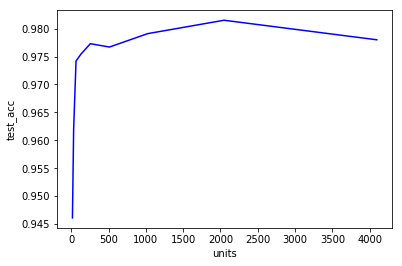

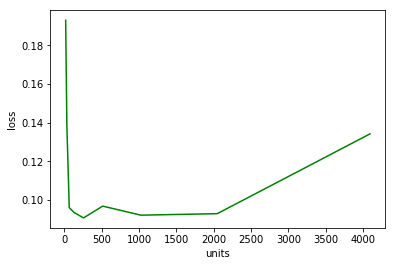

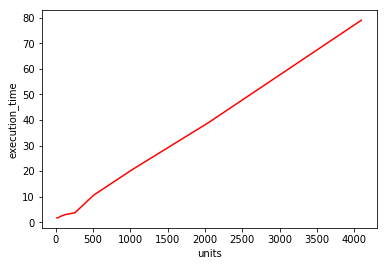

In [82]:
plt.plot(hidden_units_list, accuracies, 'b')
plt.xlabel("units")
plt.ylabel("test_acc")
plt.show()

plt.plot(hidden_units_list, losses, 'g')
plt.xlabel("units")
plt.ylabel("loss")
plt.show()

plt.plot(hidden_units_list, execution_time, 'r')
plt.xlabel("units")
plt.ylabel("execution_time")

plt.show()